In [2]:
# 2 (c)
import numpy as np

x = np.array([-2, -1, 0, 3, 3.5])
y = np.array([0, 0, 1, 3, 3])

u1 = np.maximum(0, -x - 1)
u2 = np.maximum(0, x + 1)
u3 = np.maximum(0, x - 2)

U = np.vstack([u1, u2, u3, np.ones(len(x))]).T

weights_bias = np.linalg.inv(U.T @ U) @ U.T @ y

W_out = weights_bias[:-1]
b_out = weights_bias[-1]

print("Output Weights (W_out):", W_out)
print("Output Bias (b_out):", b_out)

Output Weights (W_out): [ 5.55111512e-16  1.00000000e+00 -1.00000000e+00]
Output Bias (b_out): -5.551115123125783e-16


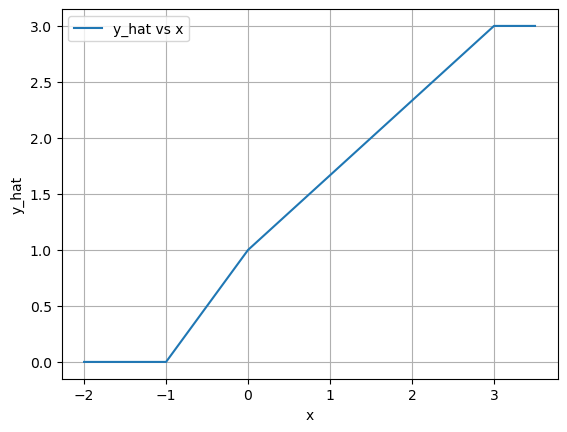

In [8]:
y_hat = W_out[0] * u1 + W_out[1] * u2 + W_out[2] * u3 + b_out

import matplotlib.pyplot as plt

plt.plot(x, y_hat, label='y_hat vs x')
plt.xlabel('x')
plt.ylabel('y_hat')
plt.grid()
plt.legend()
plt.show()

In [ ]:
def predict(x, W_hid, b_hid, W_out, b_out):
    z_hid = W_hid * x.reshape(-1, 1) + b_hid.reshape(-1, 1)

    u_hid = np.maximum(0, z_hid)

    y_hat = W_out @ u_hid + b_out

    return y_hat

In [ ]:
# 3. (h)
def calculate_dL_du(a, u, dL_dy):
    
    
    numerator = a[None, :] * np.sum(u, axis=1) - np.sum(a[None, :] * u, axis=1)
    denominator = np.sum(u, axis=1) ** 2

    dy_du = numerator / denominator
    dL_du = dL_dy[:, None] * dy_du
    return dL_du